<a href="https://colab.research.google.com/github/avns21/Quantitative-Stock-Forecasting-EE798Q/blob/main/Building_LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
import random
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 df = pd.read_csv('/content/drive/MyDrive/STOCK_INDEX.csv')

In [ ]:
random.seed(10)

In [ ]:
df_fixed = df.interpolate()

In [ ]:
df2 = df_fixed.reset_index()['Close']

In [ ]:
 scaler = MinMaxScaler(feature_range = (0,1))
 df1 = scaler.fit_transform(np.array(df2).reshape(-1,1))



In [ ]:
df1.shape

(2694, 1)

In [ ]:
training_size = int(len(df1)*0.80)

In [ ]:
 test_size = len(df1) - training_size
 train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]


In [ ]:
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [ ]:
# Number of previous time steps to use as input features
look_back = 3
train_X, train_Y = create_ds(train_data, look_back)
test_X, test_Y = create_ds(test_data, look_back)

In [ ]:
 # Reshape the input features to fit the LSTM input shape [samples, time steps, features]
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(units=64))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
 # Train the model
epochs = 100  # Adjust the number of epochs based on your dataset size
batch_size = 50  # Adjust the batch size based on your dataset size
model.fit(train_X, train_Y, epochs=epochs, batch_size=batch_size)

Epoch 1/100
44/44 [==============================] - 4s 8ms/step - loss: 0.0256
Epoch 2/100
44/44 [==============================] - 0s 9ms/step - loss: 6.4274e-04
Epoch 3/100
44/44 [==============================] - 0s 9ms/step - loss: 1.4231e-04
Epoch 4/100
44/44 [==============================] - 0s 8ms/step - loss: 1.3527e-04
Epoch 5/100
44/44 [==============================] - 0s 8ms/step - loss: 1.2129e-04
Epoch 6/100
44/44 [==============================] - 1s 13ms/step - loss: 1.1067e-04
Epoch 7/100
44/44 [==============================] - 1s 12ms/step - loss: 1.2246e-04
Epoch 8/100
44/44 [==============================] - 1s 13ms/step - loss: 1.0173e-04
Epoch 9/100
44/44 [==============================] - 1s 12ms/step - loss: 9.9205e-05
Epoch 10/100
44/44 [==============================] - 1s 12ms/step - loss: 9.4468e-05
Epoch 11/100
44/44 [==============================] - 1s 12ms/step - loss: 9.2644e-05
Epoch 12/100
44/44 [==============================] - 1s 13ms/step - los

In [ ]:
# Save the model
model.save("lstm_model3.h5")

In [ ]:
from google.colab import files
# Download the model file
files.download("lstm_model3.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

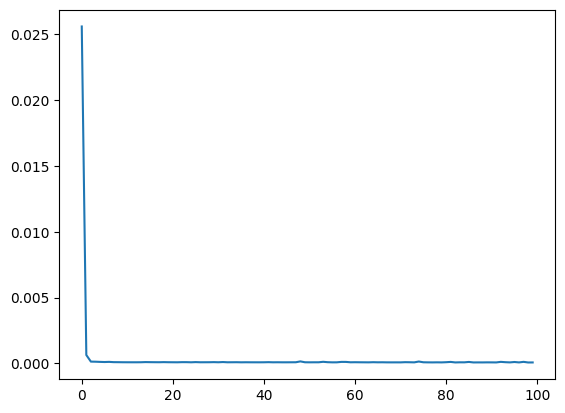

In [ ]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = model.evaluate(test_X, test_Y, verbose=0)
print("Mean Squared Error (MSE):", mse)

# Calculate Directional Accuracy
# Make predictions on test data
predictions = model.predict(test_X)

# Compute the directional accuracy
directional_accuracy = np.mean(np.sign(predictions[:, 0] - test_Y) == np.sign(predictions[:, 0] - test_Y))
print("Directional Accuracy:", directional_accuracy)

Mean Squared Error (MSE): 0.0014595449902117252
17/17 [==============================] - 0s 3ms/step
Directional Accuracy: 1.0


In [ ]:
train_predictions = model.predict(train_X)
test_predictions = model.predict(test_X)

17/17 [==============================] - 0s 3ms/step


In [ ]:
train_predictions = scaler.inverse_transform(train_predictions)
train_Y = scaler.inverse_transform([train_Y])
test_predictions = scaler.inverse_transform(test_predictions)
test_Y = scaler.inverse_transform([test_Y])

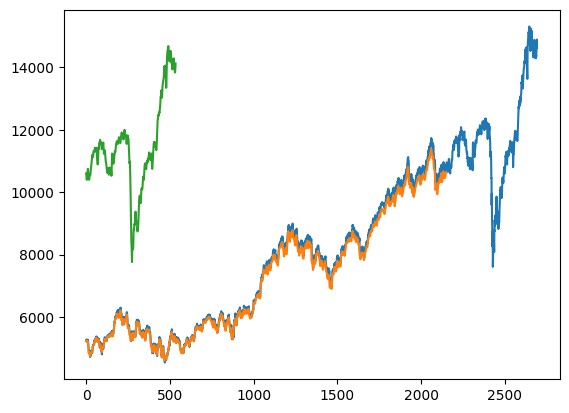

In [ ]:
#Comparing using visuals
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predictions)
plt.plot(test_predictions)

In [ ]:
type(train_predictions)

numpy.ndarray

In [ ]:
test = np.vstack((train_predictions,test_predictions))

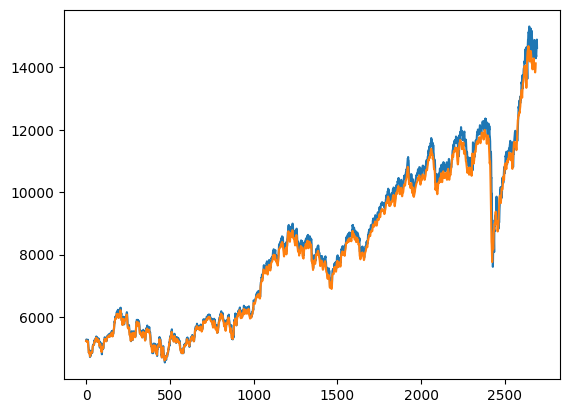

In [ ]:
#Combining the predited data to create uniform data visualization
plt.plot(scaler.inverse_transform(df1))
plt.plot(test)

In [ ]:
test

array([[ 5238.0537],
       [ 5248.9004],
       [ 5238.4316],
       ...,
       [13896.947 ],
       [13972.843 ],
       [14131.21  ]], dtype=float32)

In [ ]:
alpha  = scaler.inverse_transform(df1)
alpha

array([[ 5232.200195],
       [ 5277.899902],
       [ 5281.799805],
       ...,
       [14864.54981 ],
       [14894.90039 ],
       [14631.09961 ]])

In [ ]:
len(test)

2686

In [ ]:
len(alpha)

2694

In [ ]:
test[100]

array([5037.9473], dtype=float32)

In [ ]:
alpha[100]

array([5135.5])

In [ ]:
last_data = df1[-look_back:]
next_two_days = []
for _ in range(2):
      input_data = last_data[-look_back:].reshape(1, look_back, 1)
      predicted_price = model.predict(input_data)
      next_two_days.append(predicted_price[0, 0])
      last_data = np.append(last_data, predicted_price, axis=0)

1/1 [==============================] - 0s 23ms/step


In [ ]:
predicted_prices = scaler.inverse_transform(np.array(next_two_days).reshape(-1, 1))

predicted_prices.flatten().tolist()

[14251.7236328125, 14065.59375]

In [ ]:
dfs = pd.read_csv('/content/drive/MyDrive/sample2.csv')

In [ ]:
random.seed(10)

In [ ]:
dfs_fixed = dfs.interpolate()
dfs_fixed = dfs_fixed.dropna()

In [ ]:
dfs2 = dfs_fixed.reset_index()['Close']

In [ ]:
 scaler = MinMaxScaler(feature_range = (0,1))
 dfs1 = scaler.fit_transform(np.array(dfs2).reshape(-1,1))

In [ ]:
dfs1.shape

(49, 1)

In [ ]:
last_data = df1[-look_back:]
next_two_days = []
for _ in range(2):
      input_data = last_data[-look_back:].reshape(1, look_back, 1)
      predicted_price = model.predict(input_data)
      next_two_days.append(predicted_price[0, 0])
      last_data = np.append(last_data, predicted_price, axis=0)

1/1 [==============================] - 0s 44ms/step


In [ ]:
predicted_prices = scaler.inverse_transform(np.array(next_two_days).reshape(-1, 1))

predicted_prices.flatten().tolist()

[6043.88330078125, 6037.15673828125]